# Project in Pandas (Covid-19)

We'll download this file using the urlretrieve function from the urllib.request module

In [1]:
from urllib.request import urlretrieve
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv', 
            'italy-covid-daywise.csv')


('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1b922a23288>)

In [2]:
import pandas as pd
covid_df = pd.read_csv('italy-covid-daywise.csv')


In [3]:
type(covid_df)

pandas.core.frame.DataFrame

In [4]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [6]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [7]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [8]:
covid_df.shape

(248, 4)

# Retrieving data from a data frame
The first thing you might want to do is to retrieve data from this data frame e.g. the counts of a specific day or the list of values in a specific column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: the keys are column names, and the values are lists/arrays containing data for the respective columns.


In [9]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using a data structure called Series, which is essentially a numpy array with some extra methods and properties.



In [10]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [11]:
covid_df['new_cases'][246]

975.0

Pandas also provides the .at method to directly retrieve at a specific row & column.

In [12]:
covid_df.at[246,'new_cases']

975.0

Instead of using the indexing notation [], Pandas also allows accessing columns as properties of the data frame using the . notation. However, this method only works for columns whose names do not contain spaces or special chracters.

covid_df.new_cases

In [13]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [14]:
cases_df = covid_df[['date','new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


Sometimes you might need a full copy of the data frame, in which case you can use the copy method

In [15]:
covid_df_copy = covid_df.copy()

The data within covid_df_copy is completely separate from covid_df, and changing values inside one of them will not affect the other.

To access a specific row of data Pandas provides the .loc method.



In [16]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [17]:
covid_df.loc[243]

date          2020-08-30
new_cases           1444
new_deaths             1
new_tests          53541
Name: 243, dtype: object

In [18]:
covid_df.loc[108:114]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0


To view the first or last few rows of data, we can use the .head and .tail methods.

In [19]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [20]:
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


Notice above that while the first few values in the new_cases and new_deaths columns are 0, the corresponding values within the new_tests column are NaN. That is because the CSV file does not contain any data for the new_tests column for certain dates (you can verify this by looking into the file). It's possible that these values are missing or unknown.

In [21]:
covid_df.at[0,'new_tests']

nan

We can find the first index that doesn't contain a NaN value using first_valid_index method of a series

In [22]:
covid_df.new_tests.first_valid_index()

111

The .sample method can be used to retrieve a random sample of rows from the data frame.


In [23]:
covid_df.sample(12)

,date,new_cases,new_deaths,new_tests
109,2020-04-18,3493.0,575.0,NaN
87,2020-03-27,6153.0,660.0,NaN
183,2020-07-01,142.0,23.0,29325.0
219,2020-08-06,384.0,10.0,32169.0
100,2020-04-09,3836.0,540.0,NaN
225,2020-08-12,412.0,6.0,27330.0
76,2020-03-16,2823.0,370.0,NaN
105,2020-04-14,3153.0,564.0,NaN
204,2020-07-22,128.0,15.0,29288.0
186,2020-07-04,223.0,15.0,28946.0


# Analyzing Data from data frames

**Q: What is the total number of reported cases and deaths related to Covid-19 in Italy?**

Similar to Numpy arrays, a Pandas series supports the sum method to answer these questions.

In [24]:
total_cases = covid_df.new_cases.sum()# total number of reported cases
total_cases

271515.0

In [25]:
total_deaths = covid_df.new_deaths.sum() # total number of reported deaths
total_deaths

35497.0

In [26]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


**Q: What is the overall death rate (ratio of reported deats to reported cases)?**

In [27]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
death_rate

0.13073679170579894

In [28]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were being reported.**

In [29]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
total_tests

5214766.0

**Q: What fraction of test returned a postive result?**

In [30]:
positive_rate = total_cases/total_tests
positive_rate

0.05206657403227681

In [31]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


# Querying and sorting rows¶
Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to chech which rows satisfy this criterion.

In [32]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [33]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


The data frame contains 72 rows, but only the first 5 & last 5 rows are displayed by default with Jupyter, for brevity. To view, all the rows, we can modify some display options.

In [34]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


Determine the days when the ratio of cases reported to tests conducted is higher than the overall positive_rate.

In [35]:
positive_rate
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [36]:
covid_df['positive_rate'] = covid_df.new_cases/covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


let's remove the positive_rate column using the drop method.

In [37]:
covid_df.drop(columns = ['positive_rate'],inplace = False) # we uses inplace = False for temporary removal of positive_rate



,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [38]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


# Sorting rows using column values

In [39]:
covid_df.sort_values('new_cases',ascending = False).head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
82,2020-03-22,6557.0,795.0,NaN,NaN
87,2020-03-27,6153.0,660.0,NaN,NaN
81,2020-03-21,5986.0,625.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
88,2020-03-28,5959.0,971.0,NaN,NaN
83,2020-03-23,5560.0,649.0,NaN,NaN
80,2020-03-20,5322.0,429.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
86,2020-03-26,5210.0,685.0,NaN,NaN


It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

# Working with dates

In [40]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the pd.to_datetime method.

In [41]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

You can see that it now has the datatype datetime64. We can now extract different parts of the data into separate columns, using the DatetimeIndex class

In [42]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [43]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2


Let's check the overall metrics for the month of May. We can query the rows for May, choose a subset of colums that we want to aggregate, and use the sum method of the data frame to get the sum of values in each chosen column

In [44]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may_metrices = covid_df_may[['new_cases','new_deaths','new_tests']]
covid_df_total = covid_df_may_metrices.sum()


In [45]:
covid_df_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

OR

In [46]:
covid_df[covid_df.month == 5][['new_cases','new_deaths','new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

# Grouping and aggregation

As a next step, we might want to summarize the daywise data and create a new dataframe with month-wise data. This is where the groupby funtion is useful. Along with a grouping, we need to specify a way to aggregate the data for each group.

In [47]:
covid_month_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].sum()
covid_month_df



,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


Aggregation by mean

In [48]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [49]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

# Merging data from multiple sources

To determine other metrics like test per million, cases per million etc. we require more some information about the country viz. it's population. Let's download another file locations.csv which contains health-related information for different countries around the world, including Italy.

In [50]:
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1b923d66108>)

In [51]:
locations_df = pd.read_csv('locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [52]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. So let's insert a location column in the covid_df dataframe with all values set to "Italy".

In [53]:
covid_df["location"] = 'Italy'
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268218.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


We can now add the columns from locations_df into covid_df using the .merge method.

In [54]:
merged_df = covid_df.merge(locations_df, on='location')
merged_df


,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,266853.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268218.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269214.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [55]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population
merged_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,...,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,266853.0,...,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268218.0,...,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269214.0,...,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270189.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461,NaN


# Writing back to files

In [56]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [57]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN,4468.753409,586.998461,NaN


To write the data from the data frame into a file, we can use the to_csv function.

In [58]:
result_df.to_csv('result.csv',index = None)

# Plotting with pandas

In [59]:
result_df.set_index('date',inplace = True)


In [60]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403


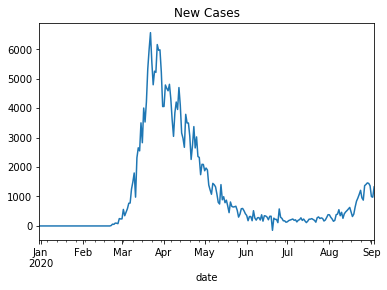

In [61]:
result_df.new_cases.plot(title = "New Cases",kind ='line')

In [62]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='python-pandas-data-19-analysis')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018ceb1026/python-pandas-data-19-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018ceb1026/python-pandas-data-19-analysis


'https://jovian.ml/2018ceb1026/python-pandas-data-19-analysis'